# Data understanding and Exploratory analysis (EDA)
## Topic: Examining the ecological processes influencing the assembly of molecules into OM assemblages


Dataset: 10 May 2022
Water with site and CFs 

## Data Processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

In [5]:
# Load dataset
fn_water = "../Dataset/Water_Prevalence_10__commat_2021-09-29.csv"
df_water = pd.read_csv(fn_water)
print('Water: ' + str(df_water.shape))

# Data quality check
print(df_water.columns.nunique())

# Join datasets
df = df_water.copy()

# Check if there is any identical columns / CF across all samples
print("Duplicated column: " + str(df.columns.duplicated().any()))

# Pre-processing
df = df.rename(columns={"Unnamed: 0": "sample_id"})
df = df.set_index("sample_id").fillna(0).reset_index()

# For analysis
sw = df_water.rename(columns={"Unnamed: 0": "sample_id"}).set_index("sample_id")
print("Shape:" + str(sw.shape))

sw = sw.T
print(sw.shape)
sw.head()

Water: (265, 4936)
4936
Duplicated column: False
Shape:(265, 4935)
(4935, 265)


sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0097_U_2,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3
C10H10O5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
C10H10O5N2,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
C10H10O5S,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
C10H10O6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
C10H10O6N2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


## DOM clustering based on site

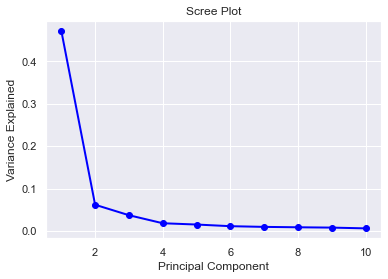

In [6]:
# Dimensionality reduction
from sklearn.decomposition import PCA
n = 10

#define PCA model to use
pca = PCA(n_components=n)

#fit PCA model to data
pca_fit = pca.fit(sw)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

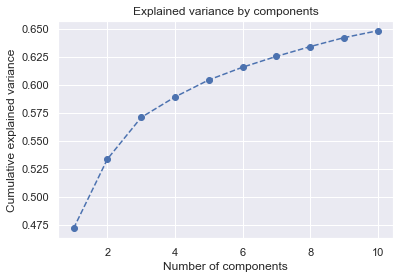

In [7]:
plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Distortion ; Inertias ; Silhouette


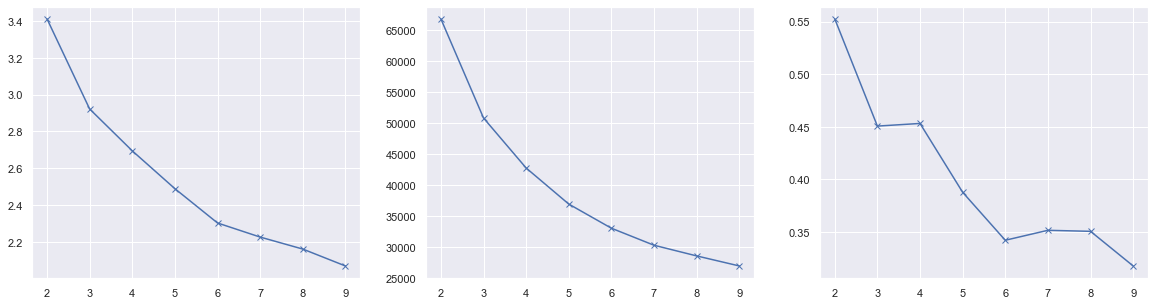

In [8]:
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Select n PCs based on scree plot
npc = 6

# PCA
pca = PCA(n_components=npc)
pca_fit = pca.fit(sw)
X = pca.transform(sw)

distortions = []
inertias = []
sil = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    sil.append(silhouette_score(X, kmeanModel.labels_, metric = 'euclidean'))
    
f, axs = plt.subplots(1,3, figsize=(20,5))
print("Distortion ; Inertias ; Silhouette")
axs[0].plot(K, distortions, 'bx-')
axs[1].plot(K, inertias, 'bx-')
axs[2].plot(K, sil, 'bx-')

# Hierachical Clustering on PCs

Text(0.5, 1.0, 'Dendrograms')

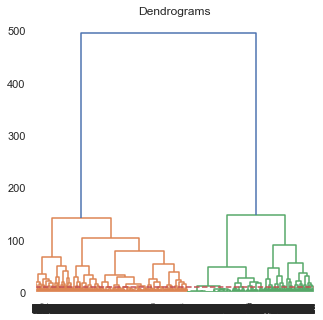

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(5, 5))
dendogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.title("Dendrograms")  

# Unsupervised k-Means Clustering

In [10]:
# Based on the plots decide k = 6
k = 6

In [11]:
kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
kmeanModel.fit(X)
distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
inertias.append(kmeanModel.inertia_)

from sklearn import metrics
metrics.silhouette_score(X, kmeanModel.labels_, metric='euclidean')

0.34214618474332625

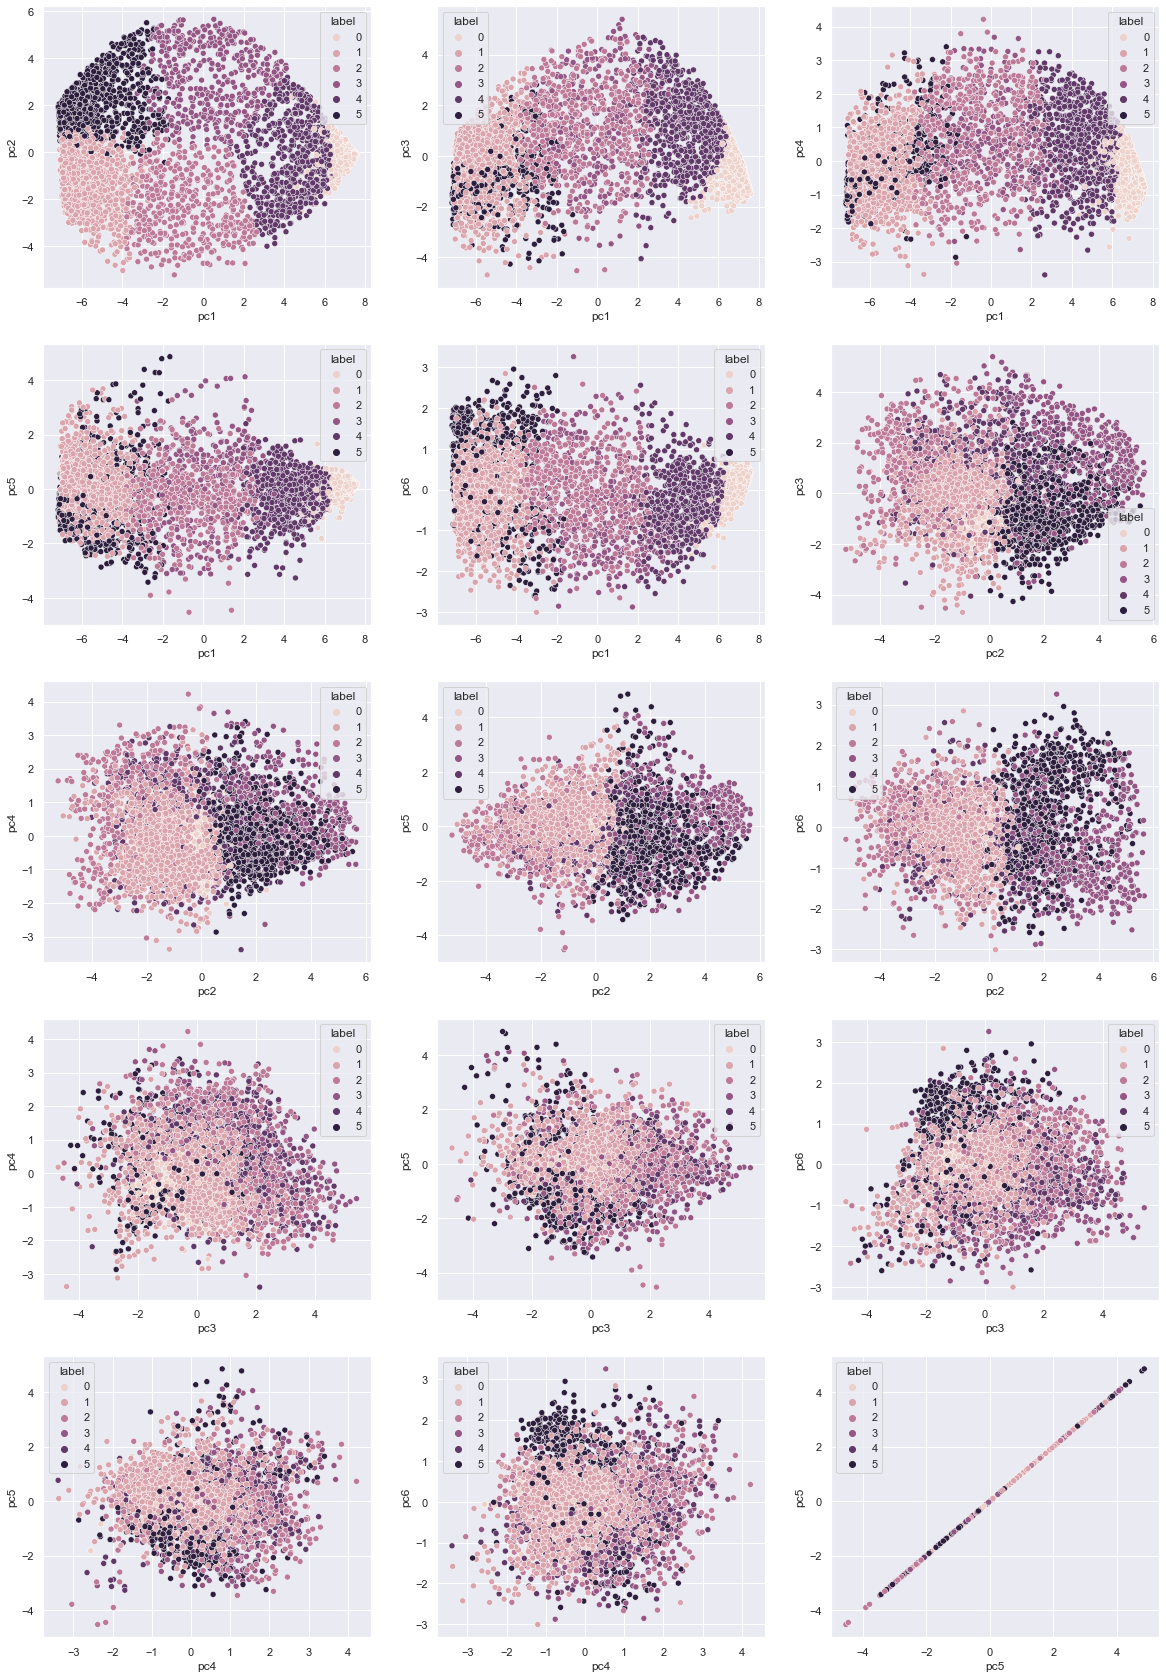

In [22]:
# Visualise 6 npcs
sw_pca_kmeans = pd.concat([sw.reset_index(), pd.DataFrame(X)], axis=1)
sw_pca_kmeans.columns.values[-npc:] = ['pc1','pc2', 'pc3', 'pc4', 'pc5', 'pc6'] 
sw_pca_kmeans['label'] = kmeanModel.labels_

# Plots
f, axs = plt.subplots(5, 3, figsize=(20,30))
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc2'], hue = sw_pca_kmeans['label'], ax=axs[0,0])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc3'], hue = sw_pca_kmeans['label'], ax=axs[0,1])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc4'], hue = sw_pca_kmeans['label'], ax=axs[0,2])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[1,0])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[1,1])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc3'], hue = sw_pca_kmeans['label'], ax=axs[1,2])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc4'], hue = sw_pca_kmeans['label'], ax=axs[2,0])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[2,1])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[2,2])
sns.scatterplot(sw_pca_kmeans['pc3'], sw_pca_kmeans['pc4'], hue = sw_pca_kmeans['label'], ax=axs[3,0])
sns.scatterplot(sw_pca_kmeans['pc3'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[3,1])
sns.scatterplot(sw_pca_kmeans['pc3'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[3,2])
sns.scatterplot(sw_pca_kmeans['pc4'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[4,0])
sns.scatterplot(sw_pca_kmeans['pc4'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[4,1])
sns.scatterplot(sw_pca_kmeans['pc5'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[4,2])
plt.show()

In [29]:
# Presence of CF per cluster
results = sw.copy()
results['DOM_cluster'] = kmeanModel.labels_
results['DOM_cluster'].value_counts()

1    1316
0    1202
5     755
4     706
2     484
3     472
Name: DOM_cluster, dtype: int64

In [53]:
mapping = results['DOM_cluster'].reset_index()
mapping

,index,DOM_cluster
0,C10H10O5,0
1,C10H10O5N2,5
2,C10H10O5S,5
3,C10H10O6,0
4,C10H10O6N2,5
...,...,...
4930,C9H8O6S,5
4931,C9H8O7,3
4932,C9H8O8,1
4933,C9H9O5N,3


In [52]:
## For each site what is the prominent cluster, i.e. for each site how many % of 6 DOMs
results.head()

sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3,DOM_cluster
C10H10O5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
C10H10O5N2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,5
C10H10O5S,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,5
C10H10O6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
C10H10O6N2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,5


In [51]:
results['DOM_cluster'].head(10)

C10H10O5      0
C10H10O5N2    5
C10H10O5S     5
C10H10O6      0
C10H10O6N2    5
C10H10O6S     5
C10H10O7      4
C10H10O7S     5
C10H10O8      4
C10H10O8S     5
Name: DOM_cluster, dtype: int32

In [45]:
temp = results.groupby(['DOM_cluster']).sum()
temp.head(6)

sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0097_U_2,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3
DOM_cluster,,,,,,,,,,,,,,,,,,,,,
0,1155,1200,1200,1200,1202,1197,1200,1169,1176,1194,...,1198,1175,1178,1179,1111,1189,1199,1165,1038,1195
1,189,184,278,261,292,276,251,104,136,243,...,331,118,268,208,138,97,172,78,31,128
2,130,255,321,291,297,292,219,92,130,237,...,266,112,242,249,156,57,175,49,16,101
3,255,209,262,309,313,294,426,340,389,382,...,348,144,153,108,46,390,445,350,41,244
4,540,644,671,657,680,666,651,540,565,639,...,629,437,517,510,359,482,609,399,150,599
5,66,68,50,105,85,77,334,163,245,427,...,238,96,95,61,52,461,617,382,13,91


In [54]:
temp.sum()

sample_id
SW_S19S.0003_U_1    2335
SW_S19S.0003_U_2    2560
SW_S19S.0003_U_3    2782
SW_S19S.0004_U_1    2823
SW_S19S.0004_U_2    2869
                    ... 
SW_S19S.0099_U_1    2676
SW_S19S.0099_U_2    3217
SW_S19S.0099_U_3    2423
SW_S19S.0100_U_1    1289
SW_S19S.0100_U_3    2358
Length: 265, dtype: int64

In [48]:
temp2 = temp.div(temp.sum(axis=1), axis=0).multiply(100)
temp2.head(6)

sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0097_U_2,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3
DOM_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.374406,0.388993,0.388993,0.388993,0.389641,0.388020,0.388993,0.378944,0.381213,0.387048,...,0.388344,0.380889,0.381861,0.382185,0.360143,0.385427,0.388669,0.377647,0.336479,0.387372
1,0.315705,0.307353,0.464370,0.435974,0.487756,0.461030,0.419270,0.173721,0.227174,0.405907,...,0.552901,0.197107,0.447666,0.347443,0.230515,0.162029,0.287308,0.130291,0.051782,0.213811
2,0.215571,0.422851,0.532294,0.482547,0.492496,0.484205,0.363154,0.152558,0.215571,0.393002,...,0.441091,0.185723,0.401293,0.412901,0.258685,0.094520,0.290192,0.081254,0.026532,0.167482
3,0.364343,0.298618,0.374345,0.441498,0.447213,0.420066,0.608667,0.485791,0.555802,0.545800,...,0.497221,0.205747,0.218606,0.154310,0.065725,0.557230,0.635814,0.500079,0.058581,0.348626
4,0.362784,0.432653,0.450792,0.441387,0.456839,0.447433,0.437356,0.362784,0.379579,0.429294,...,0.422576,0.293586,0.347332,0.342629,0.241184,0.323818,0.409139,0.268057,0.100773,0.402421
5,0.145876,0.150296,0.110512,0.232075,0.187870,0.170188,0.738219,0.360269,0.541508,0.943772,...,0.526037,0.212183,0.209973,0.134825,0.114932,1.018920,1.363717,0.844311,0.028733,0.201132


In [ ]:
## For each DOM, link it with averaged metadata across site for analysis?


## Merged site ID with DOM cluster